## Analyse Benchmark Testbed

In [47]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import pickle

DATA_NAME = 'university_k_6_L_2_n_10_chancap500_numchans1_mldat2e6_bidirectional'
# DATA_NAME = 'ndf50_mldat6e6_load0.4_university'
path_to_benchmark_data = '/scratch/datasets/trafpy/management/flowcentric/{}_testbed_data_v8.obj'.format(DATA_NAME)
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [48]:
%autoreload
# unpack env dicts into list of env objects
envs = tb_dict['envs']

In [49]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

# analyse
analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             print_summary=True)



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.1_repeat_0_scheduler_FS'
Measurement duration: 2621475.636599966 (Start time : 291275.0707333296 μs | End time: 2912750.7073332956 μs)
Total number of generated demands (jobs or flows) passed to env: 158459
Total number of these demands which arrived during measurement period: 142725
Total info arrived: 3994443656.0 B
Total info transported: 3863539913.0 B
Load (abs): 1523.7386150880895 B/μs
Load (frac): 0.10158257433920596 fraction of network capacity requested.
Throughput (abs): 1473.8034788722973 B/μs
Throughput (frac): 0.9672285418763208 fraction of arrived info successfully transported.
T-Score: 25.21388585504893

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 158459
Total number of these flows which arrived during measurement period: 142725
Time first flow arrived: 291287.22694507043 μs
Time last fl



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.2_repeat_0_scheduler_Rand'
Measurement duration: 2473297.5636004857 (Start time : 274810.840400054 μs | End time: 2748108.40400054 μs)
Total number of generated demands (jobs or flows) passed to env: 316918
Total number of these demands which arrived during measurement period: 285018
Total info arrived: 7365598741.0 B
Total info transported: 6970030160.0 B
Load (abs): 2978.0479508003805 B/μs
Load (frac): 0.1985365300533587 fraction of network capacity requested.
Throughput (abs): 2818.112249240818 B/μs
Throughput (frac): 0.9462951221062179 fraction of arrived info successfully transported.
T-Score: 28.150418440204724

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 316918
Total number of these flows which arrived during measurement period: 285018
Time first flow arrived: 274832.45529671 μs
Time last flow a



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.5_repeat_0_scheduler_FF'
Measurement duration: 2078530.132800668 (Start time : 230947.79253340757 μs | End time: 2309477.9253340755 μs)
Total number of generated demands (jobs or flows) passed to env: 633836
Total number of these demands which arrived during measurement period: 570157
Total info arrived: 15505041150.0 B
Total info transported: 13402331533.0 B
Load (abs): 7459.618172149415 B/μs
Load (frac): 0.4973078781432943 fraction of network capacity requested.
Throughput (abs): 6447.985199493516 B/μs
Throughput (frac): 0.8643854217052497 fraction of arrived info successfully transported.
T-Score: -79.42722528909397

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 633836
Total number of these flows which arrived during measurement period: 570157
Time first flow arrived: 230951.69752867092 μs
Time last f



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.3_repeat_0_scheduler_Rand'
Measurement duration: 3592996.0383998975 (Start time : 399221.78204443306 μs | End time: 3992217.8204443306 μs)
Total number of generated demands (jobs or flows) passed to env: 633836
Total number of these demands which arrived during measurement period: 570085
Total info arrived: 16054004306.0 B
Total info transported: 12739685658.0 B
Load (abs): 4468.138604781062 B/μs
Load (frac): 0.2978759069854041 fraction of network capacity requested.
Throughput (abs): 3545.6998899652235 B/μs
Throughput (frac): 0.7935519023897788 fraction of arrived info successfully transported.
T-Score: -15.02800823521248

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 633836
Total number of these flows which arrived during measurement period: 570085
Time first flow arrived: 399224.0626340364 μs
Time las

In [50]:
# TEMPORARY CELL FOR RENAMING ANY PREVIOUSLY SAVED SCHEDULER NAMES WITH NEW SHORTENED CONVENTION
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name == 'fair_share':
        analyser.env.scheduler.scheduler_name = 'FS'
    elif analyser.env.scheduler.scheduler_name == 'first_fit':
        analyser.env.scheduler.scheduler_name = 'FF'
    elif analyser.env.scheduler.scheduler_name == 'random':
        analyser.env.scheduler.scheduler_name = 'Rand'
    elif analyser.env.scheduler.scheduler_name == 'srpt_v2':
        analyser.env.scheduler.scheduler_name = 'SRPT'
    elif analyser.env.scheduler.scheduler_name[0:6] == 'lambda':
        analyser.env.scheduler.scheduler_name = '\u03BB' + str(analyser.env.scheduler._lambda) + 'S'
    analyser.subject_class_name = analyser.env.scheduler.scheduler_name

Load Subject     T-Score  Mean FCT (μs)  p99 FCT (μs)  Max FCT (μs)  \
0    0.1    SRPT   27.703248          340.8        1585.9      363262.7   
1    0.1      FS   25.213886          352.7        1819.5      348762.7   
2    0.1    Rand   20.215728          384.8        2190.0      369762.7   
3    0.1      FF   17.608824          554.0        4355.8      332762.7   
4    0.2    SRPT   39.972140          372.4        1640.5     2073815.3   
5    0.2      FS   35.657520          427.6        2833.9      877315.3   
6    0.2    Rand   28.150418          517.1        3240.1     1250463.0   
7    0.2      FF   11.970015         1077.6       10726.6      949761.8   
8    0.3    SRPT   22.281930          420.9        1898.9     2763461.4   
9    0.3      FS    6.434429          714.4        7117.6     2080167.3   
10   0.3    Rand  -15.028008          713.0        4935.0     3119460.4   
11   0.3      FF  -44.169452         1095.4       11513.8     1880010.2   
12   0.4    SRPT   -0.209692          419.8        2098.4     2167602.1   
13   0.4      FF  -20.717946          798.9        8142.0     1600602.1   
14   0.4      FS  -32.213569          796.9        9280.3     2174444.5   
15   0.4    Rand  -48.074195          778.8        6798.3     2114315.9   
16   0.5    SRPT  -32.818791          428.3        2430.4     1292328.3   
17   0.5      FS  -69.830415          719.8        5877.5     1454251.4   
18   0.5      FF  -79.427225          772.5        7501.4     1645091.8   
19   0.5    Rand -106.175819          972.9        8229.7     1791381.7   

    Throughput Frac  Frac Flows Dropped  Frac Info Dropped  
0          0.978769            0.000168             0.0212  
1          0.967229            0.000182             0.0328  
2          0.966566            0.000210             0.0334  
3          0.978362            0.000224             0.0216  
4          0.959363            0.000074             0.0406  
5          0.959371            0.000098             0.0406  
6          0.946295            0.000140             0.0537  
7          0.967635            0.000232             0.0324  
8          0.869884            0.000200             0.1300  
9          0.897613            0.000289             0.1020  
10         0.793552            0.000410             0.2060  
11         0.920461            0.000575             0.0795  
12         0.837107            0.000314             0.1630  
13         0.867669            0.000430             0.1320  
14         0.864627            0.000494             0.1350  
15         0.786883            0.000584             0.2130  
16         0.839390            0.000502             0.1610  
17         0.839366            0.000710             0.1610  
18         0.864385            0.000765             0.1360  
19         0.801229            0.000916             0.1990

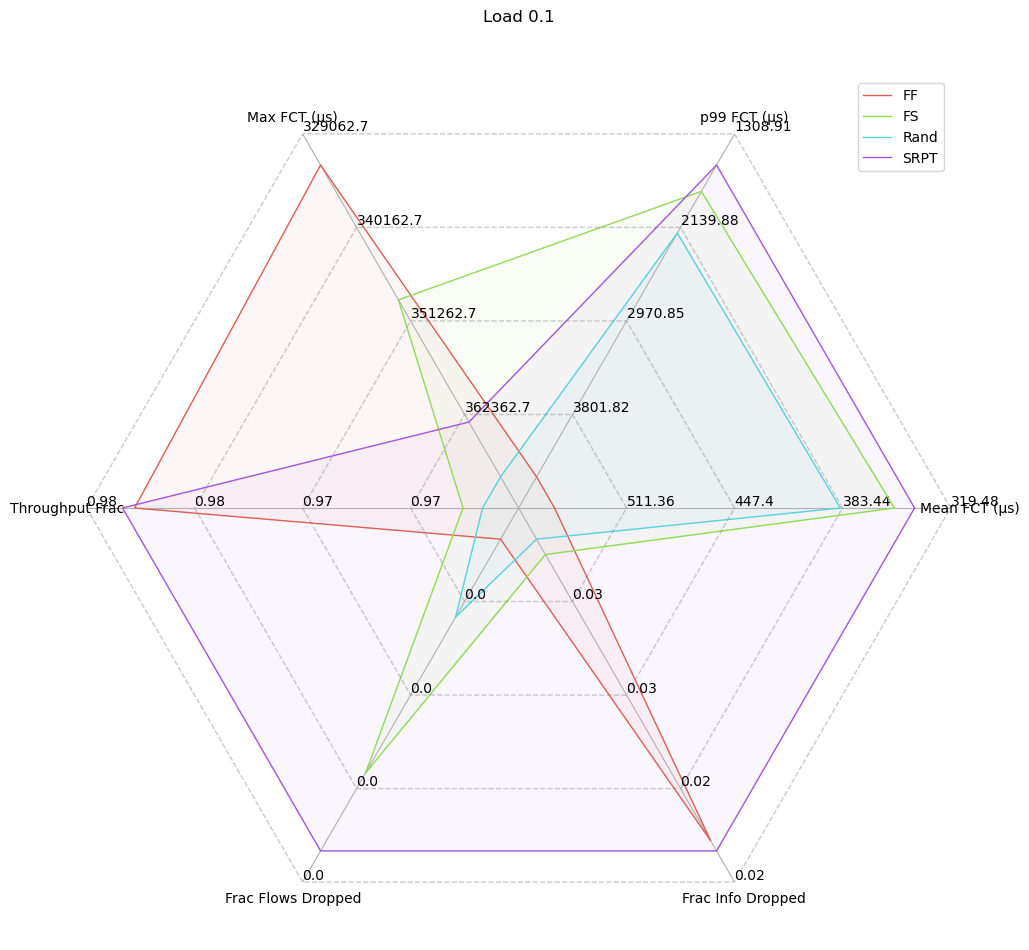

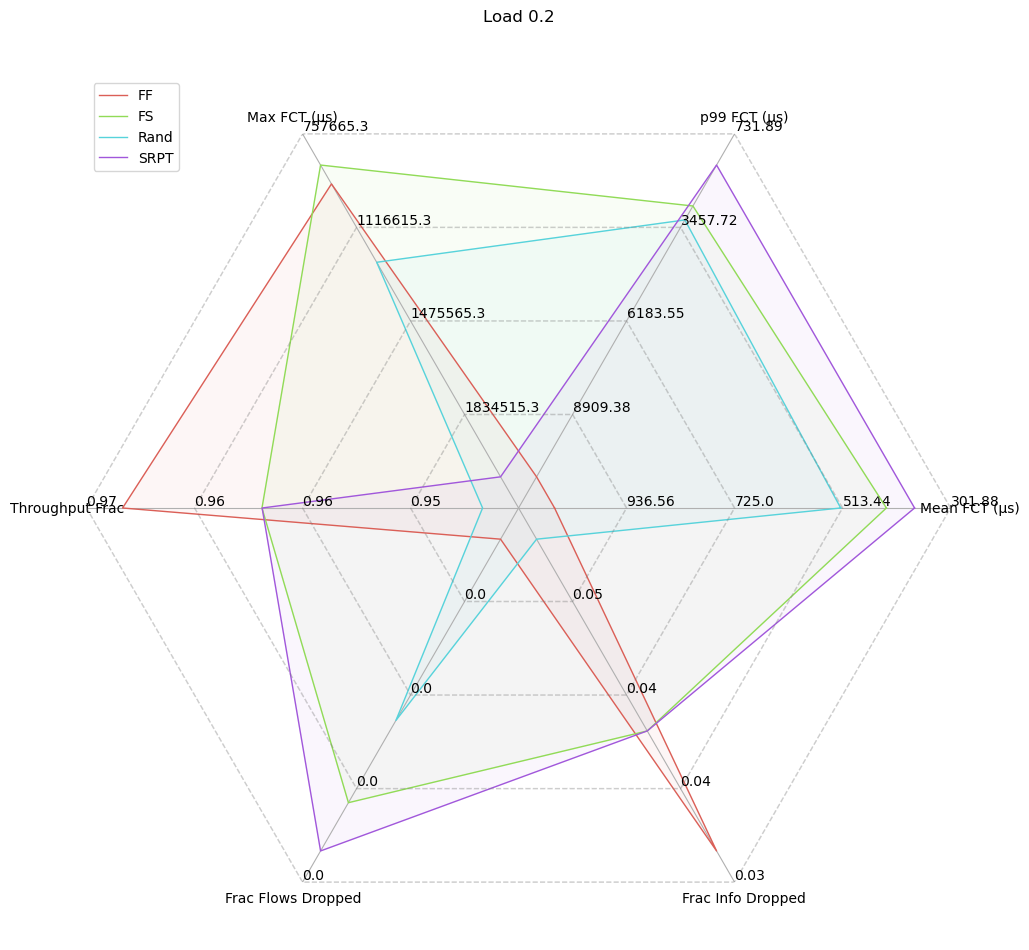

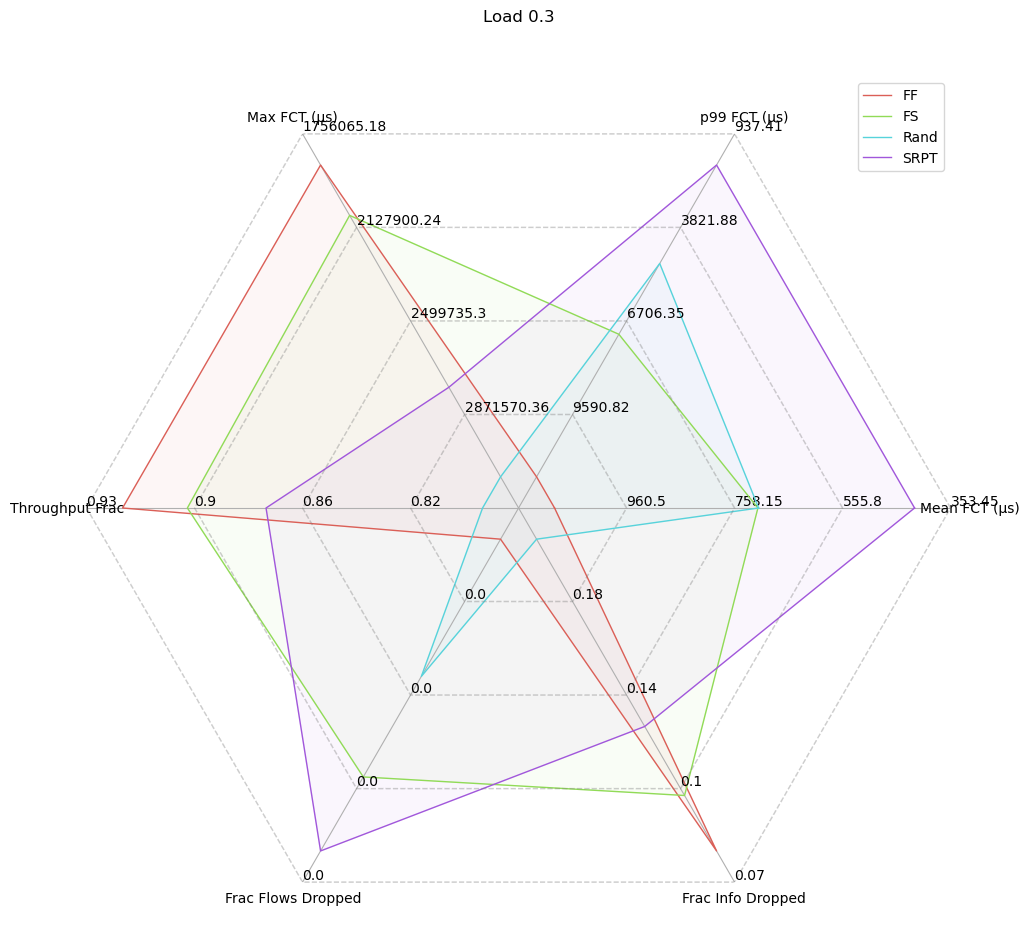

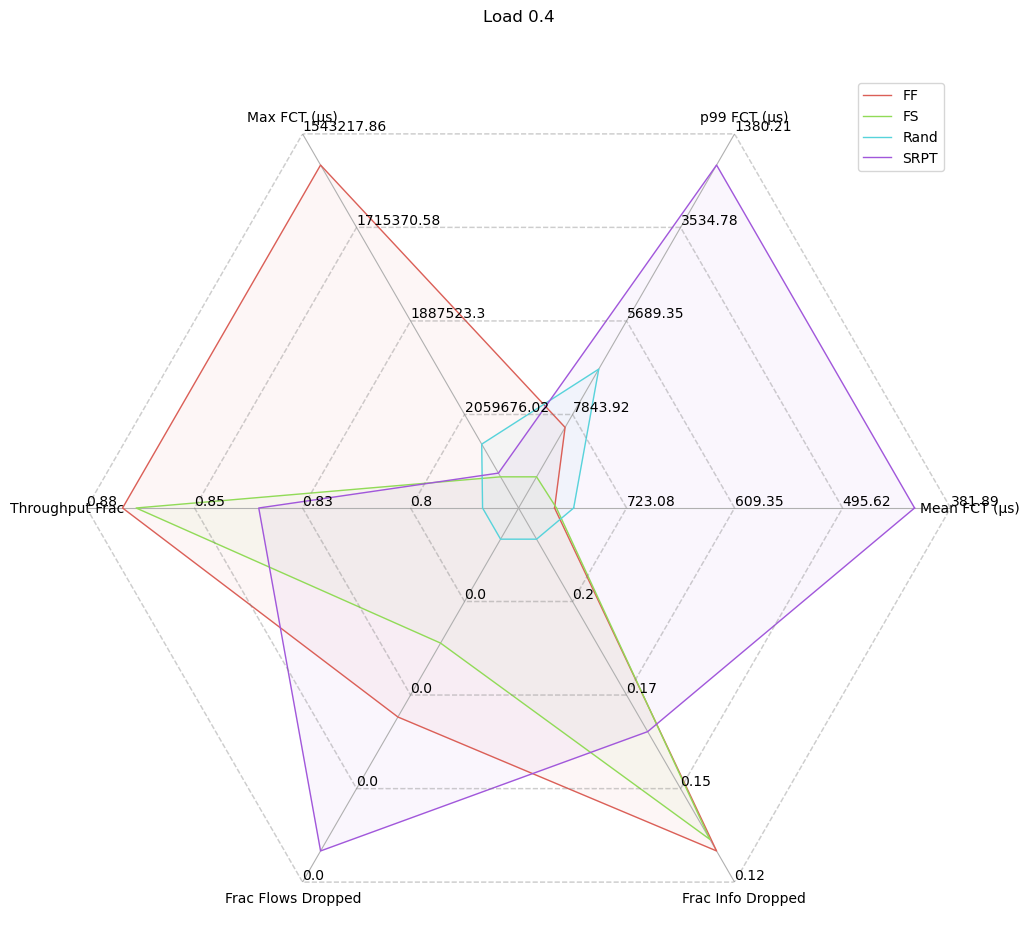

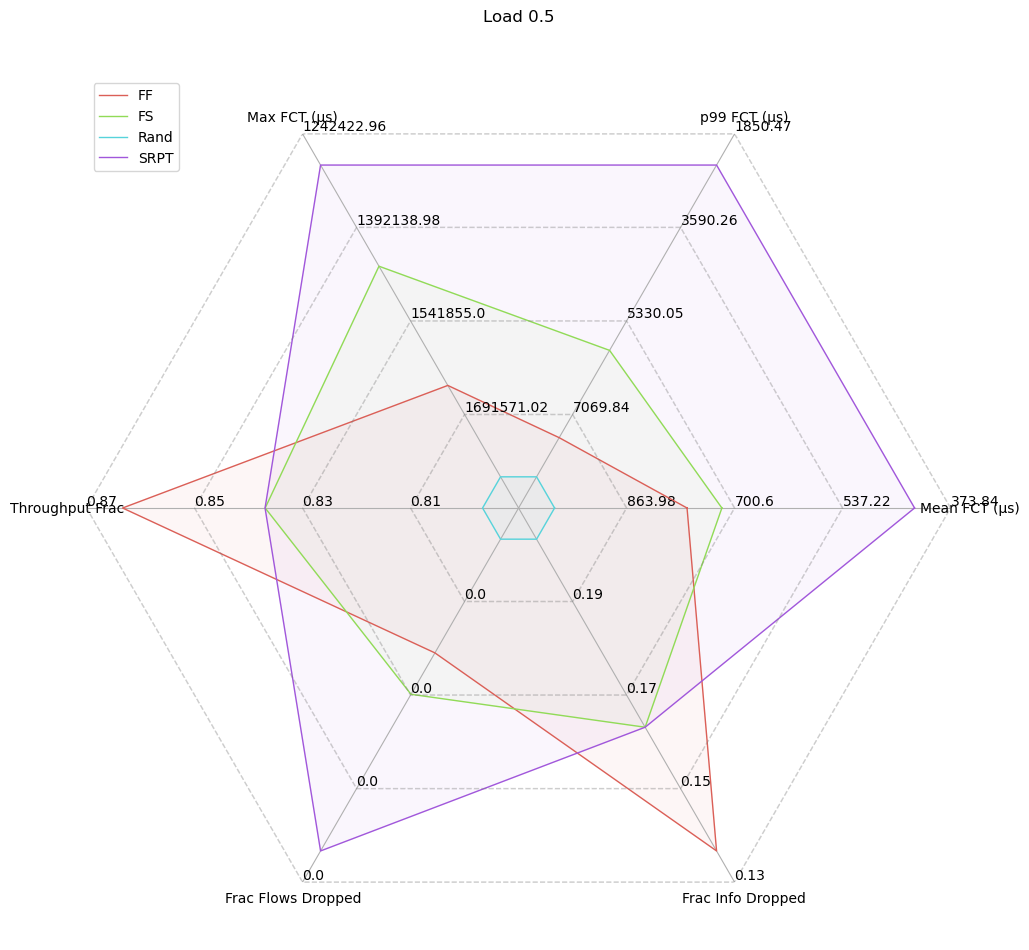

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.style.use(plot_style)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.style.use(plot_style)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/zciccwf/phd_project/projects/trafpy/traf

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/zciccwf/phd_project/projects/trafpy/traf

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if logscale:
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if logscale:
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/zciccwf/phd_project/projects/trafpy/traf

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

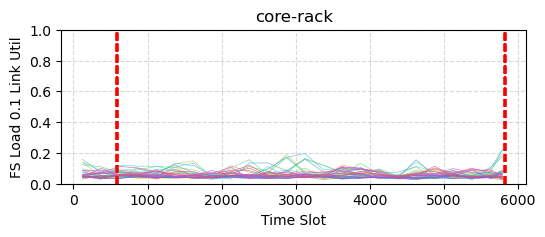

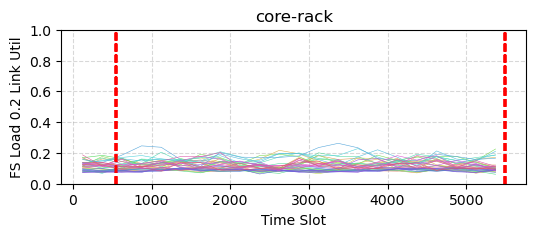

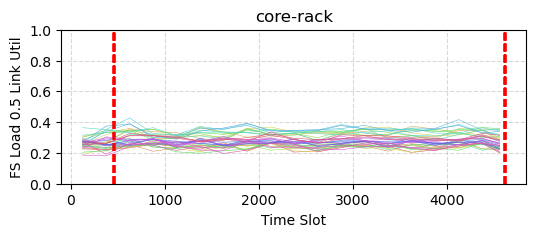

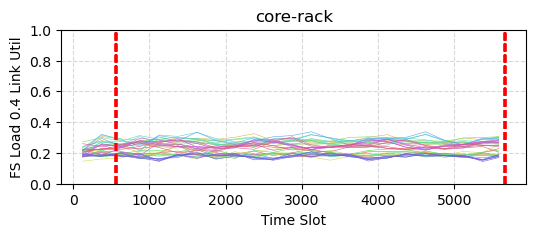

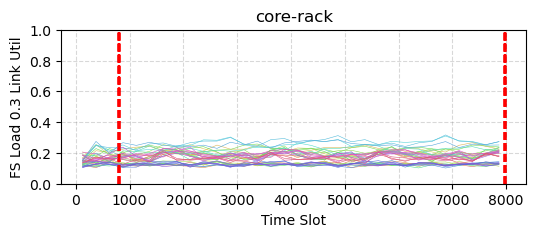

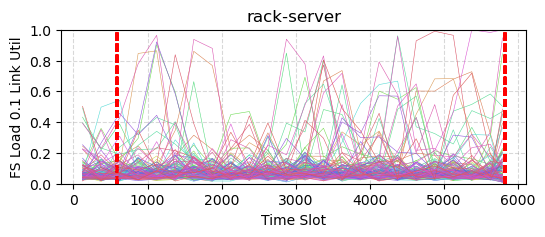

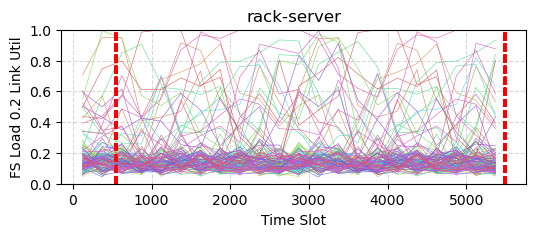

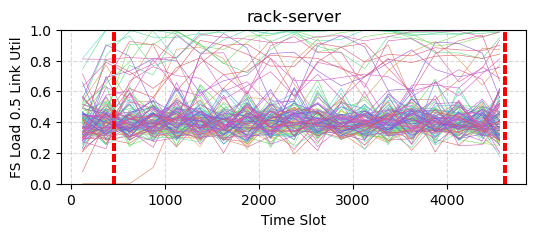

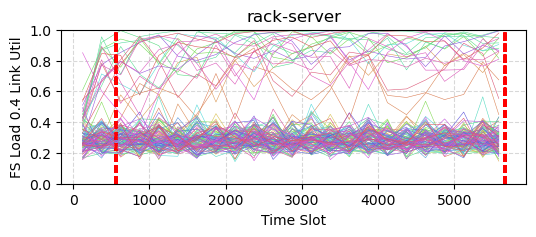

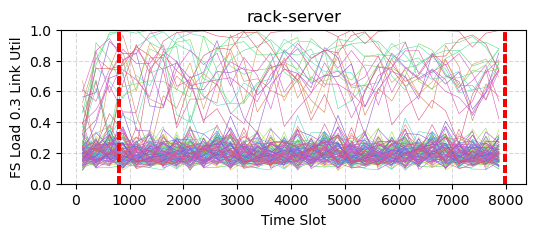

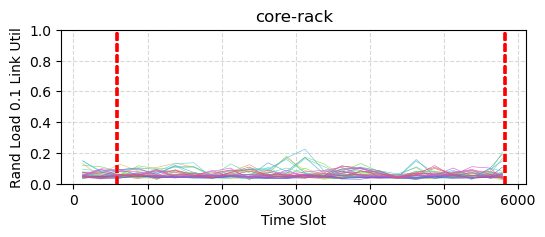

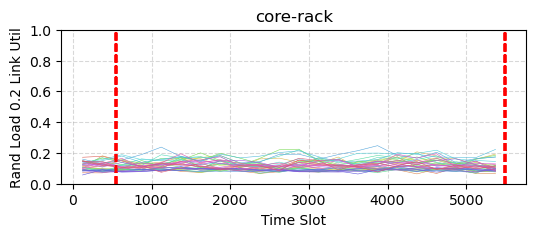

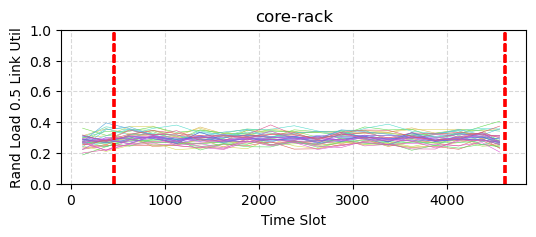

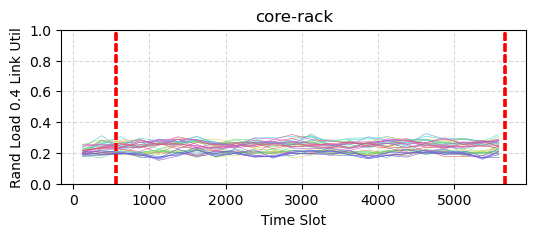

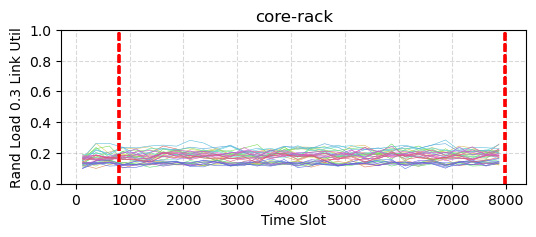

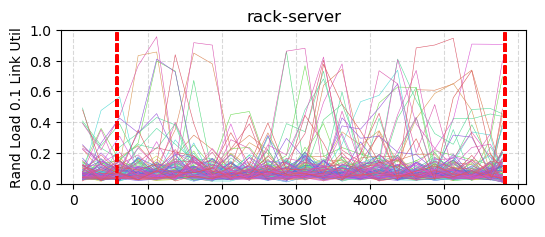

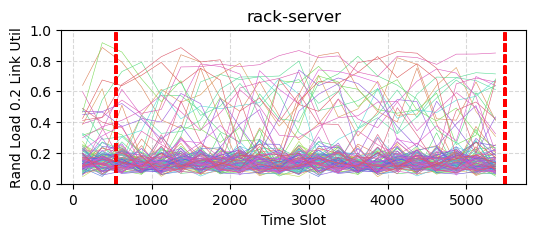

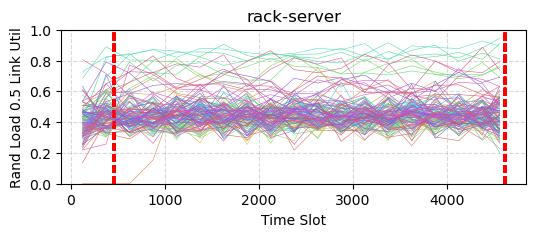

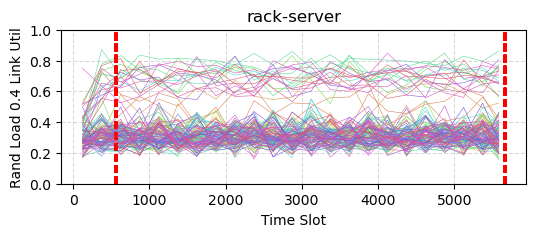

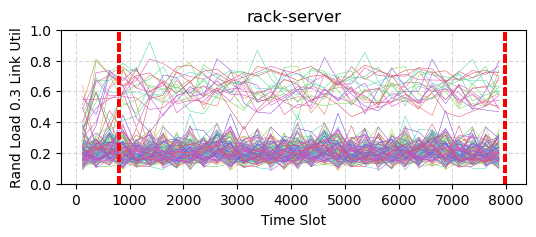

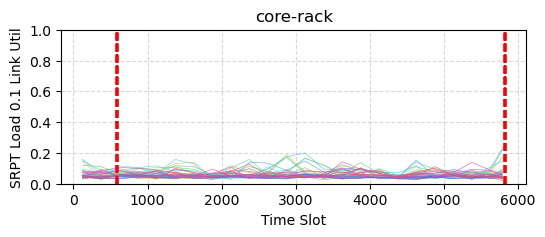

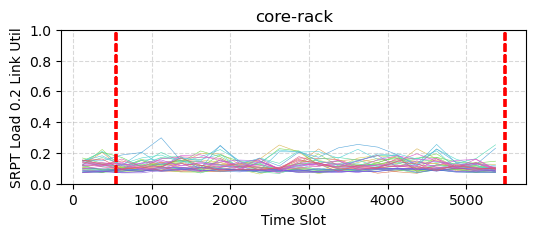

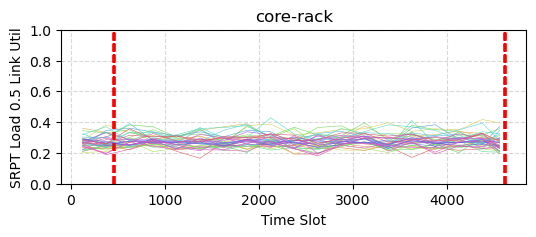

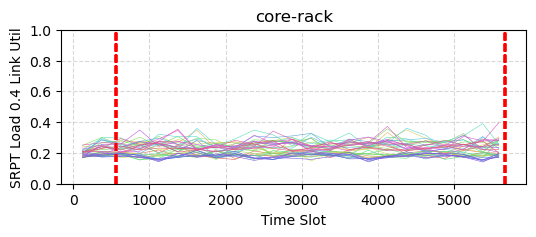

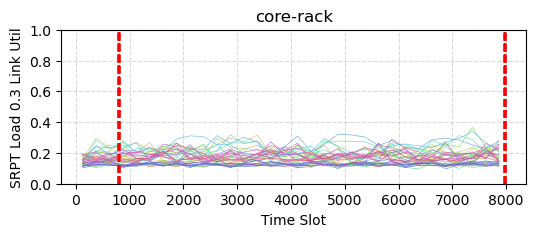

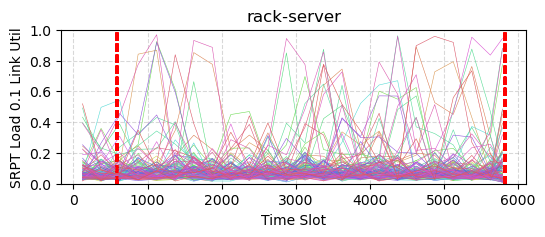

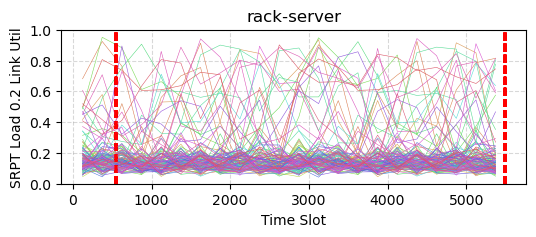

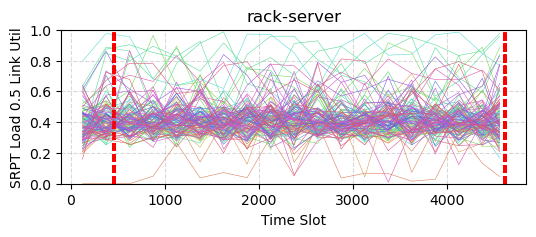

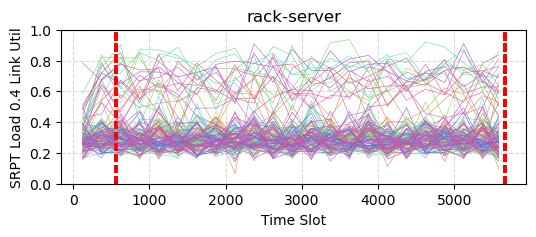

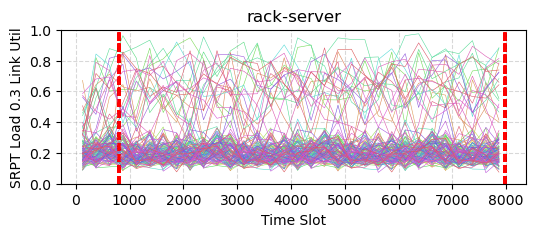

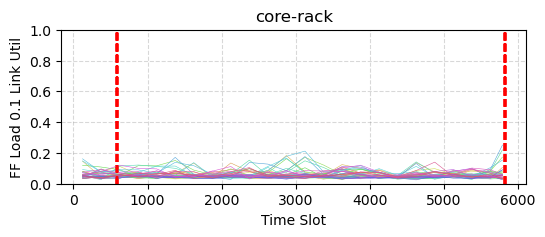

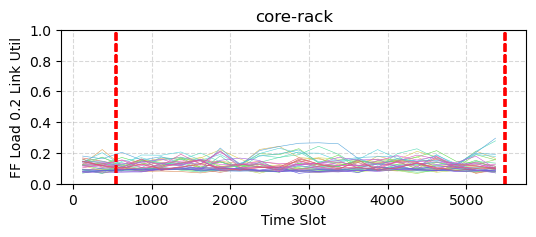

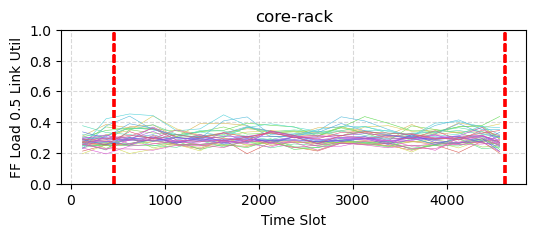

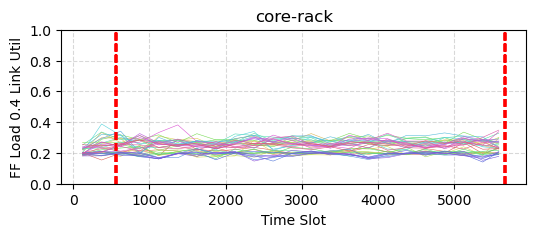

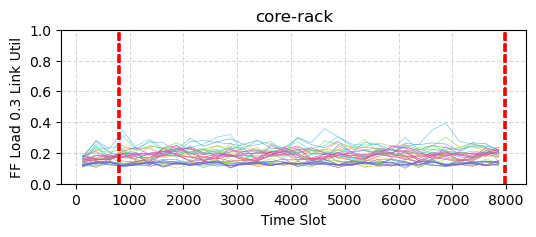

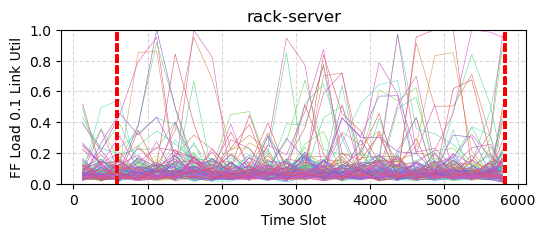

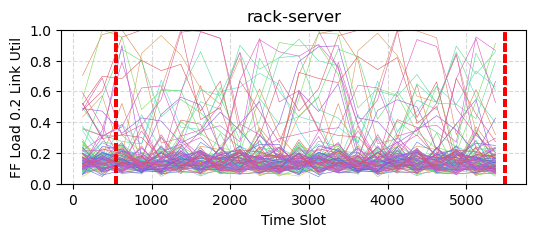

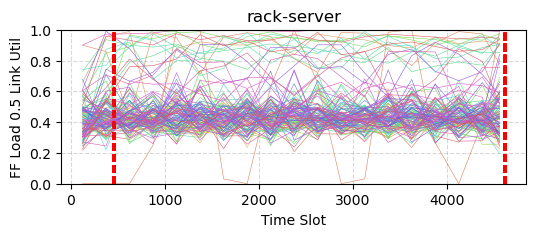

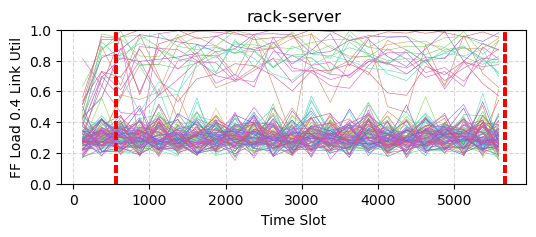

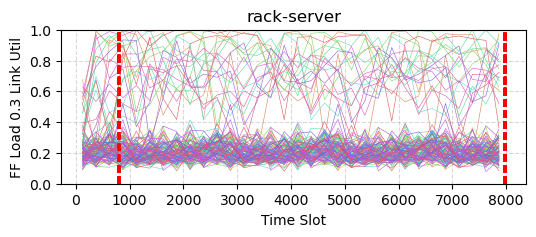

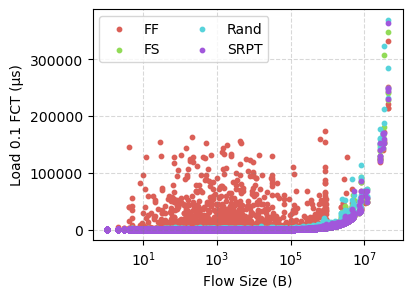

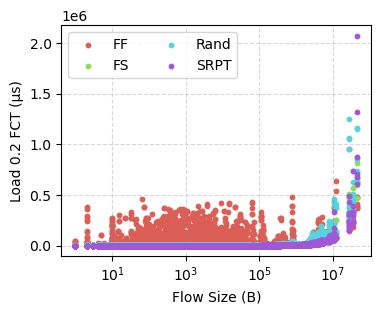

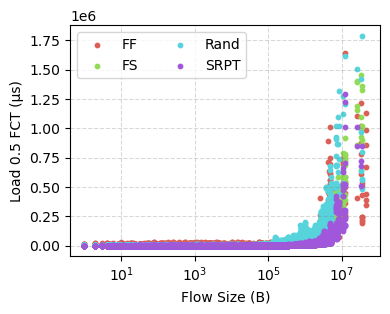

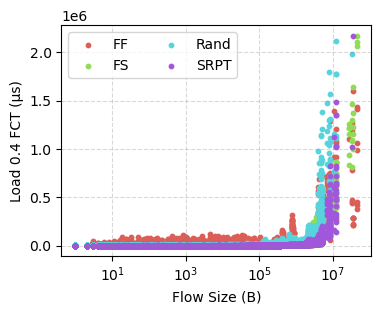

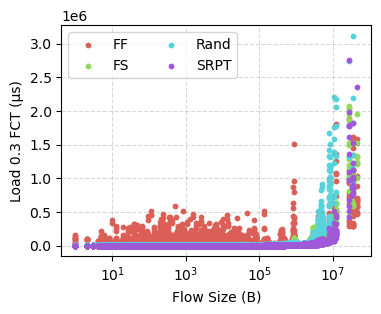

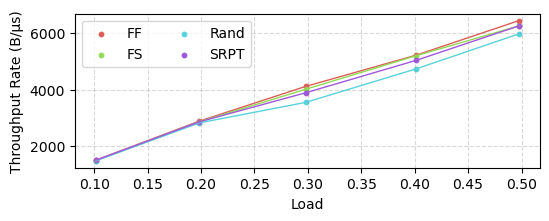

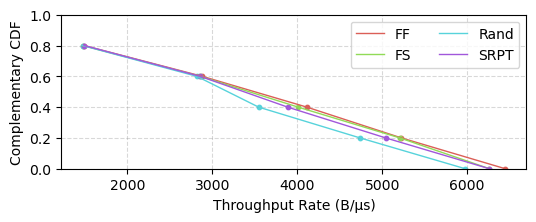

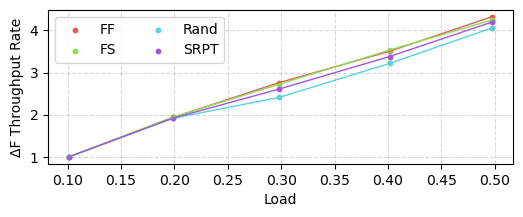

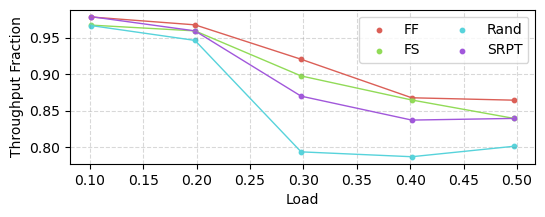

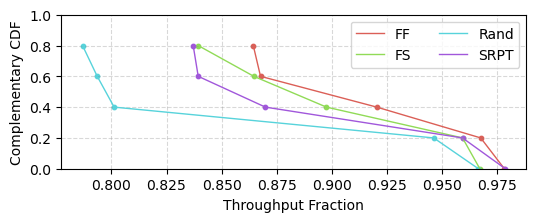

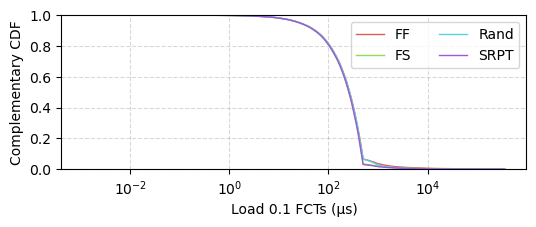

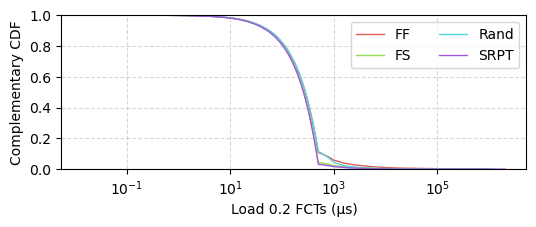

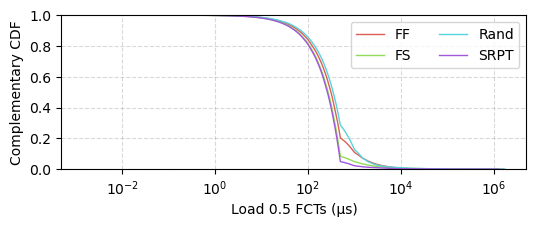

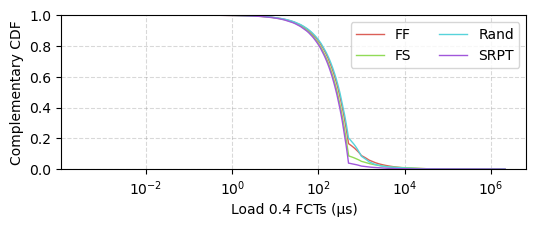

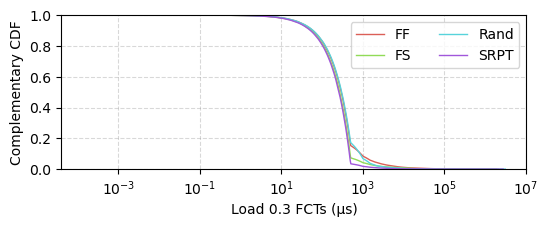

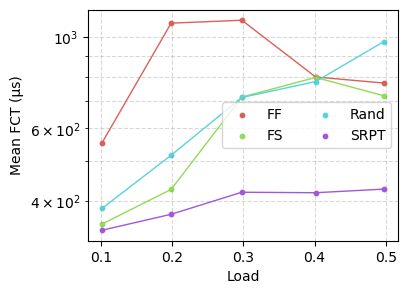

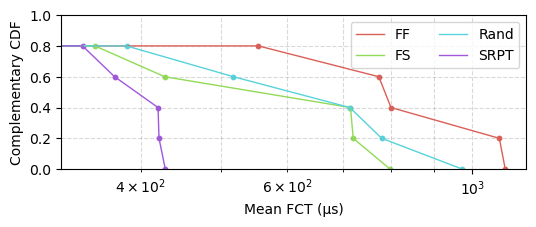

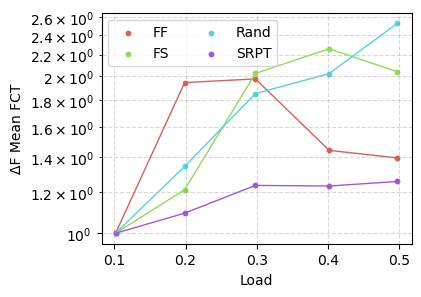

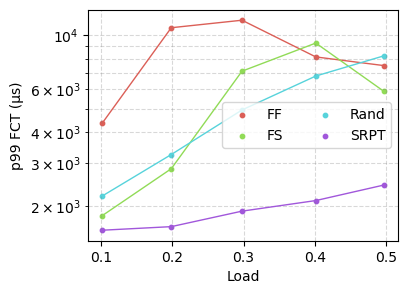

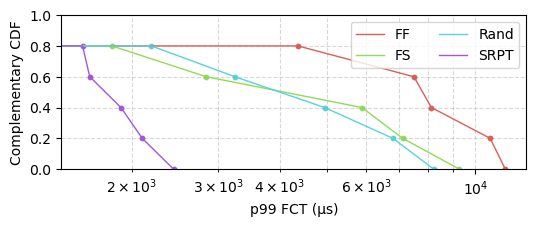

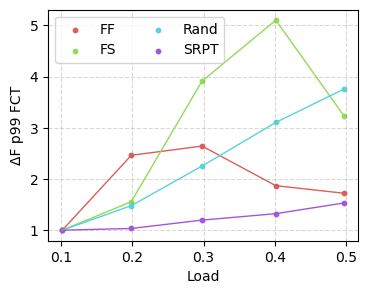

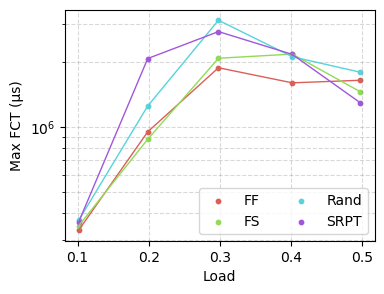

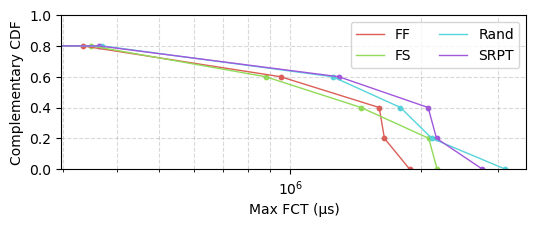

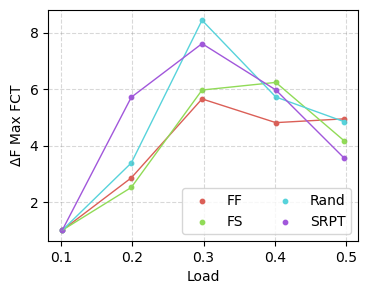

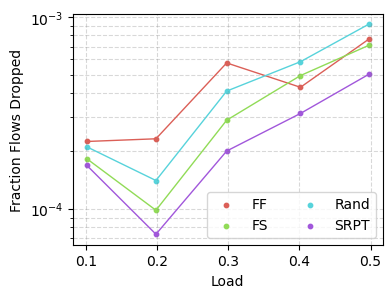

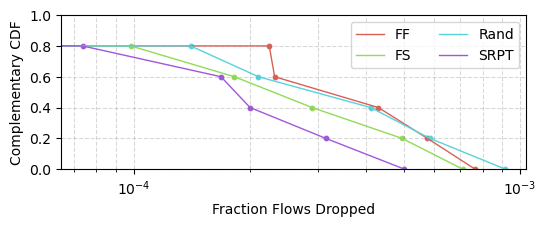

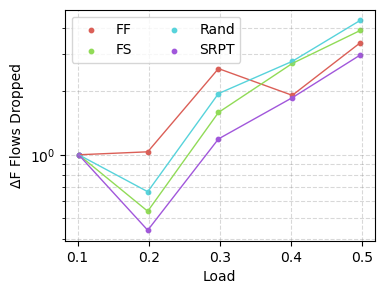

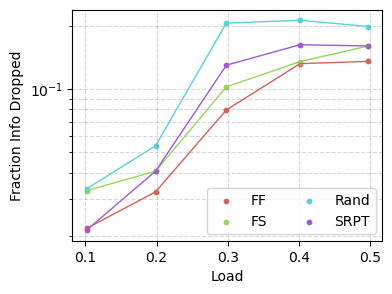

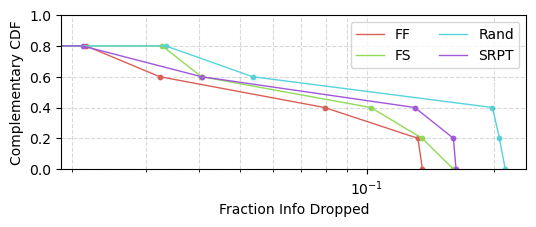

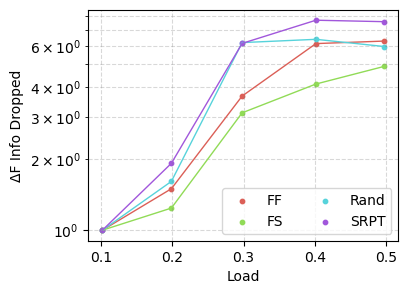

In [51]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter
    
# plot
plotter = EnvsPlotter(time_units='\u03BCs', info_units='B')
_ = plotter.display_t_score_table(*analysers, display_table=True)
# _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

# COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
# _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

# COMMENT IF WANT TO SAVE TIME
_ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=250, figsize=(6, 2), legend_ncol=2, plot_legend=False) # mean_period=2500
# _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)




_ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)
_ = plotter.plot_throughput_rate_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_throughput_frac_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_fcts_cdf_for_different_loads(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_mean_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_max_fct_vs_load(*analysers, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

In [ ]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

# Custom Plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


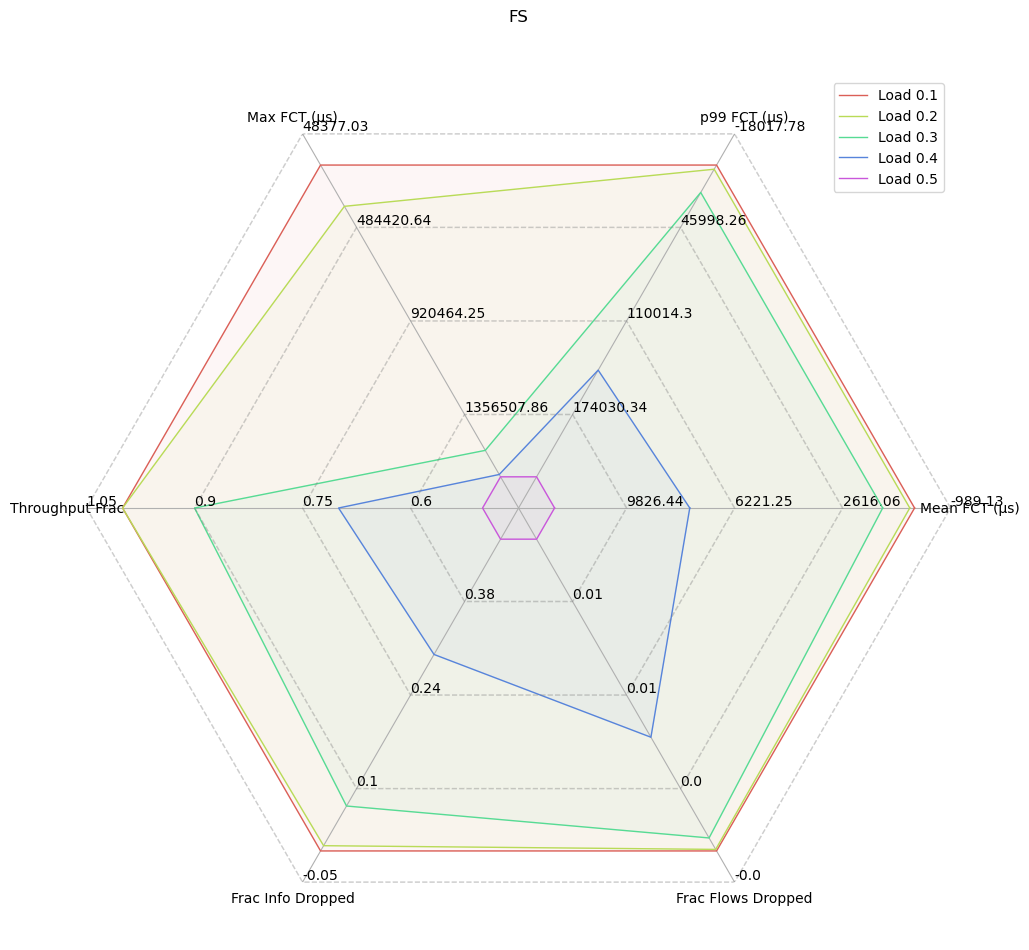

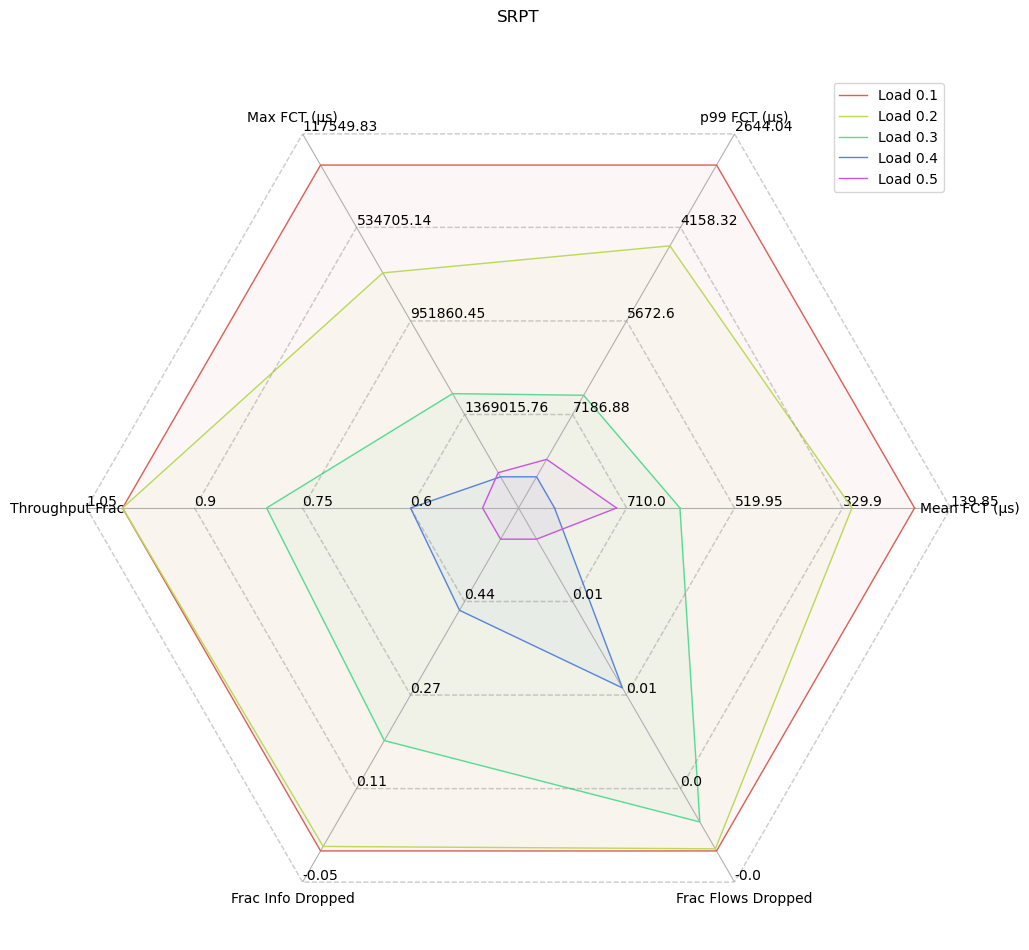

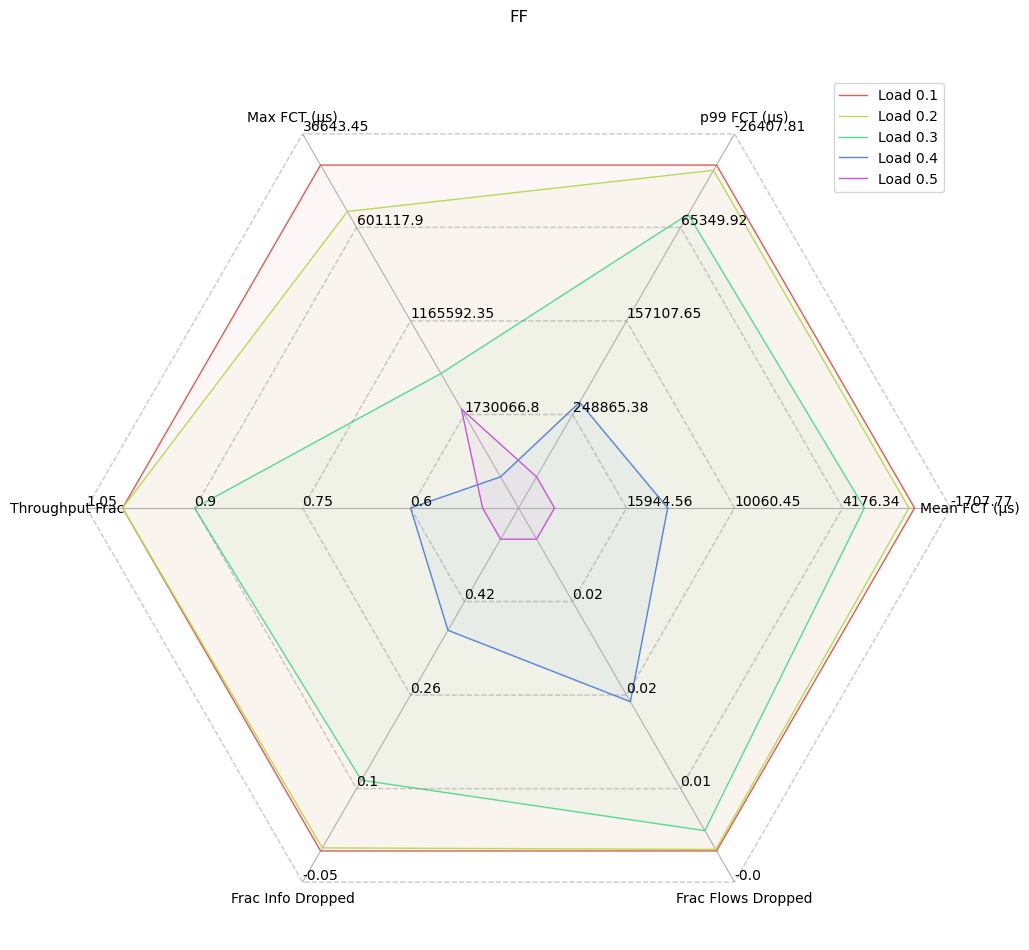

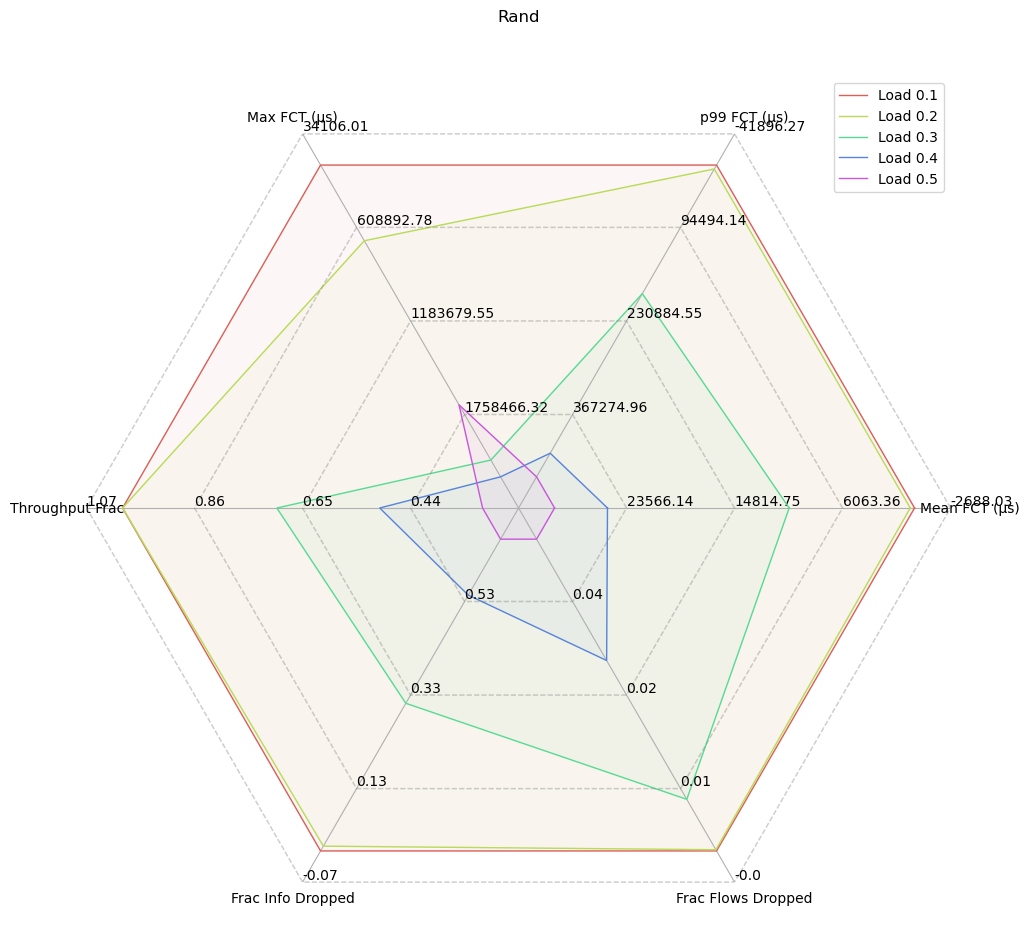

In [21]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict
import sigfig


def get_summary_dict(analysers, headers, time_units='', info_units=''):
    summary_dict = {header: [] for header in headers}
    for analyser in analysers:
        # self._check_analyser_valid(analyser)
        summary_dict['Load'].append(round(analyser.load_frac, 2))
        summary_dict['Subject'].append(analyser.subject_class_name)
        summary_dict['T-Score'].append(analyser.t_score)
        summary_dict['Mean FCT ({})'.format(time_units)].append(round(analyser.mean_fct, 1))
        summary_dict['p99 FCT ({})'.format(time_units)].append(round(analyser.nn_fct, 1))
        summary_dict['Max FCT ({})'.format(time_units)].append(round(analyser.max_fct, 1))
        summary_dict['Throughput Frac'].append(round(analyser.throughput_frac, 1))
        summary_dict['Frac Flows Dropped'].append(sigfig.round(analyser.dropped_flow_frac, sigfigs=3))
        summary_dict['Frac Info Dropped'].append(sigfig.round(analyser.dropped_info_frac, sigfigs=3))
    return summary_dict



time_units = '\u03BCs'
info_units = 'B'
headers = ['Load',
           'T-Score',
           'Subject',
           'Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Frac',
           'Frac Info Dropped',
           'Frac Flows Dropped']
dont_plot_headers = ['Load', 'T-Score', 'Subject']
plot_headers = [header for header in headers if header not in dont_plot_headers]
# determine if higher is better for each header
is_higher_better = {}
for header in headers:
    if header == 'T-Score' or header == 'Throughput Frac':
        is_higher_better[header] = True
    else:
        is_higher_better[header] = False

scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
    
    for header in plot_headers:
        min_val, max_val = min(summary_dict[header]), max(summary_dict[header])
        
#         if is_higher_better[header]:
#             # want higher (better) values on outer radar edge -> don't flip range
#             _range = [0.9*min(summary_dict[header]), 1.1*max(summary_dict[header])]
#         else:
#             # want lower (better) values on outer radar edge -> flip range
#             _range = [1.1*max(summary_dict[header]), 0.9*min(summary_dict[header])]
            
        diff = max(max_val - min_val, 1e-9)
        min_val -= (0.1*diff)
        max_val += (0.1*diff)
        _range = [min_val, max_val]
#         _range = [max(min_val, 1e-9), max(max_val, 1e-9)]
        if not is_higher_better[header]:
            # flip axis
            _range = _range[::-1]

        plot_dict[header]['range'] = _range
        for i, load in enumerate(summary_dict['Load']):
            plot_dict[header]['classes']['Load {}'.format(str(load))] = summary_dict[header][i]
        
    tpg.plot_radar(plot_dict, 
                   title=scheduler_name,
                   fill=True,
                   fill_alpha=0.05,
                   figsize=(12.8, 9.6))
        
    

In [ ]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [ ]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [ ]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [ ]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

In [ ]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

In [ ]:
ep_link_capacity = 500
